# Introduction to self-supervised visual learning
> A short introduction to self-supervised visual-based learning methods.

- toc: true
- badges: true
- comments: true
- categories: self-supervised-learning
- hide: false
- search_exclude: false

In [1]:
#hide
import graphviz
import pathlib
import shutil
from IPython.display import SVG

asset_path = pathlib.Path("./2020-11-25")
asset_path.mkdir(exist_ok=True)

def generate_graph(
    inp, 
    fname="tmp", 
    path=asset_path, 
    engine="dot",
    mode="LR",
) -> str:
    """
    Generates and renders a DOT graph as an SVG file.
    Return the location of the saved file.
    """
    # WSL error if run in WSL Path
    # First create in home and then move file
    tmp_path = pathlib.Path("~").expanduser()
    graph = graphviz.Source(
        source=f'digraph G{{ rankdir="{mode}" {inp} ;}}',
        filename=fname,
        format="svg",
        directory=tmp_path,
        engine=engine
    )
    loc = graph.render()
    target_loc = asset_path / f"{fname}.svg"
    shutil.move(loc, target_loc)
    return target_loc

# About

After understanding the remote sensing data we will be working with, we will focus on the deep-learning part of my master thesis, specifically self-supervised learning.
For the following deep-learning topics, it would be helpful to have a general understanding of what deep-learning, or more generally, machine learning is. Still, I will try my best to keep the content comfortable enough for interested readers to follow along. :relaxed:

There are many great introduction resources and courses for machine learning! For a quick introduction to deep-learning, I highly recommend [3Blue1Brown's](https://www.youtube.com/c/3blue1brown) series on neural networks:

> youtube: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
<center>3Blue1Brown's tutorial on neural networks</center>

A different highly-compressed resource for machine learning in general is [The Hundred-Page Machine Learning Book](https://leanpub.com/theMLbook) by Andriy Burkov.

With that out of the way, let's take a quick refresher on learning methods and see what *self-supervised* learning methods are.

## Learning Methods

In general, there are three primary methods to train deep neural networks:
- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

### Supervised Learning

Most current state-of-the-art computer vision applications utilize  *supervised learning methods*. In this setting, the input data are *labeled* images. Humans annotate these labels. A simple scenario would be a dataset for a classification application with the two classes, "dog" and "cat". Here, a human would look at 
<a href="#Fig1">Fig. 1</a>
and conclude that it should belong to the category "dog" and annotate it as such.

<figure>
        <div>
            <figure id="Fig1">
<img src="2020-11-25/puppy.jpg" alt="Image of a puppy">
            </figure>
        </div>
    <figcaption><center>Fig 1: Example image of a dog (Image by <a href="https://pixabay.com/users/3194556-3194556/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1903313">Karen Warfel</a> from <a href="https://pixabay.com/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1903313">Pixabay</a>)</center></figcaption>
</figure>

This process is repeated for every image in the dataset until all images are labeled. Then the learning process starts. The model tries to predict the correct label, and *learns* from its mistake by comparing its predictions to the *ground-truth* labels.

In [15]:
#hide
generate_graph(
    """
    ordering=in
    nodesep=0.60
    fontsize=12

    Model[shape=box style=rounded width=1 height=0.7 label=Model]
    Data -> Model -> Prediction [weight=10]; "Human Labels" -> Loss;
    Prediction -> Loss; 
    Loss -> Model [label="Update" tailport=s headport=s]""",
    fname="supervised-learning"
);


<figure id="Fig2">
<img class="docimage" src="2020-11-25/supervised-learning.svg" alt="Flowchart of supervised training">
    <figcaption><center>Fig. 2: Supervised training loop</center></figcaption>
</figure>

<a href="#Fig2">Fig. 2</a> shows the general learning, or training, loop of a supervised method.
1. Data is fed into the Model. For example, many images of dogs and cats.
2. The model *predicts* an output. In our scenario, it could guess that the current image is a dog.
3. The prediction of the model is compared to the *correct* label. The difference between the correct label and the prediction is mathematically expressed as a loss.
4. The loss is then used to tell the model how *wrong* the prediction was and is used to update the model's parameters. This update procedure is the *learning* part.

Although supervised-learning leads to the highest model performance, there is one significant limitation: cost. The cost of annotating all images is immense. The standard large-scale image dataset used to compare research results, ImageNet {% cite Russakovsky2015 %}, has more than 1.3 million labeled images with 1,000 classes! These images have to be manually annotated and verified. The necessary steps to gather data for supervised-learning can be seen in <a href="#Fig3">Fig. 3</a>. The annotation process is even worse for video datasets, as these have a temporal dimension. 

In [22]:
#hide
generate_graph(
    """
    Labeling[color="red"]
    "Data acquisition" -> Verifying;
    "Data acquisition" -> Cleaning;
    "Data acquisition" -> Preprocessing;
    Verifying -> Labeling;
    Cleaning -> Labeling;
    Preprocessing -> Labeling;
    Labeling -> "Re-Verify"
    """,
    fname="data-gathering-label"
)

WindowsPath('2020-11-25/data-gathering-label.svg')

<figure id="Fig3">
<img class="docimage" src="2020-11-25/data-gathering-label.svg" alt="Flowchart of the data gathering process for supervised-learning methods">
    <figcaption><center>Fig. 3: Data gathering process for supervised-learning methods</center></figcaption>
</figure>

An alternative is unsupervised learning, which does not reach the same model performance as supervised learning (yet).
But, unsupervised learning has one significant practical advantage...

### Unsupervised learning

Unsupervised learning methods do not require *any* human-annotated labels. The specific methods use different approaches to *learn* from the data itself. They iterate and update their predictions in various ways and usually define their loss based on their previous predictions. The process of iterating through the data and *learning* from some definition of error/loss remains. Compare <a href="#Fig2">Fig. 2</a> with <a href="#Fig4">Fig. 4</a>.

In [37]:
#hide
generate_graph(
    """
    ordering=in
    nodesep=0.60
    fontsize=12

    Model[shape=box style=rounded width=1 height=0.7 label=Model]
    Data -> Model -> Prediction [weight=10]; 
    Prediction -> Loss [weight=10]; 
    Loss -> Model [label="Update" tailport=s headport=s]""",
    fname="unsupervised-learning"
);

<figure id="Fig4">
        <div>
            <figure>
<img src="2020-11-25/unsupervised-learning.svg" alt="Flowchart of unsupervised learning loop">
            </figure>
        </div>
    <figcaption><center>Fig. 4: Unsupervised training loop</center></figcaption>
</figure>


A classic unsupervised machine learning method is [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering). Here the data is grouped into clusters of data points that are close to each other. What these clusters *represent* is not essential for the algorithm. The interpretation is left for human evaluation. <a href="#Fig5">Fig. 5</a> shows the result of k-means on two-dimensional data. As we can see, no information about the data points themselves is required. The algorithm simply uses the *distance* between the points to *group* them. The main idea being that these groups have something *interesting* in common and belong together.


<figure id="Fig5">
        <div>
            <figure>
<img src="2020-11-25/k-means.png" alt="Image of a k-means result">
            </figure>
        </div>
    <figcaption><center>Fig. 5: Example solution of k-means (Image by Akshay Singhal from <a href="https://www.gatevidyalay.com/k-means-clustering-algorithm-example/">Gatevidyalay</a>)</center></figcaption>
</figure>

In the context of deep-learning, the time spent to train unsupervised models is generally similar to the training time of supervised methods. No time is saved during the training process! 
The main reason why unsupervised-learning methods are so interesting is because they don't require any labels!
The absence of labels reduces the overall cost and time to generate the required data and *may* lead to faster production times.

One promising subset of unsupervised learning methods for deep learning is called *self-supervised* learning.
We will take a closer look at self-supervised learning in the next section.
Before that, let's look at the last significant learning approach:
reinforcement learning.

### Reinforcement learning
Reinforcement learning is somewhat very different from the previous
learning methods due to the learning procedure's nature. Reinforcement learning does not learn from *static* data but from interactions with its *environment* as an *actor*, see <a href="#Fig6">Fig. 6</a>.

In [44]:
#hide
generate_graph(
    """
    ordering=in
    nodesep=0.60
    fontsize=12

     Agent[shape=box style=rounded width=1 height=0.7 label=Agent]
     Agent -> Environment [label="interacts" headport=n tailport=n weight=0]; 
     Environment -> Agent [label="Reward & State update" headport=s tailport=s weight=0]
     """,
    fname="reinforcement-learning"
);

<figure id="Fig6">
        <div>
            <figure>
<img src="2020-11-25/reinforcement-learning.svg" alt="Flowchart of reinforcement learning loop">
            </figure>
        </div>
    <figcaption><center>Fig. 6: Reinforcement training loop</center></figcaption>
</figure>

In short, the model tries to learn the actions which will get the highest reward. Classical variations use reinforcement learning to beat computer or board games. One model with high media coverage was [AlphaGo](https://en.wikipedia.org/wiki/AlphaGo). AlphaGo beat the 18-time world champion Lee Sedol in the board game Go,
a too hard game for machines to master for a very long time. Because reinforcement learning is so very different, we won't be going into any more detail, even if it is a fascinating subject. 

Let's go back to the previous, shortly introduced unsupervised learning method, *self-supervised* learning, as this method will be sticking with us for a very long time.

##  Self-supervised learning
Self-supervised learning was introduced as an unsupervised learning method. Therefore, self-supervised learning methods do not require any human-annotated labels. At this point, you might ask why the term *human-annotated* was always mentioned in conjunction with labels instead of just labels. The reason is that self-supervised methods create their labels! 

Instead of relying on labels from hard-working humans, these methods automatically generate their own labels, *pseudolabels*, through a so-called *pretext task*. A general self-supervised training loop can be seen in <a href="#Fig7"> Fig. 7</a>.
These pretext tasks are very different from each other. 

In [60]:
#hide
generate_graph(
    """
    ordering=in
    nodesep=0.60
    fontsize=12

    Model[shape=box style=rounded width=1 height=0.7 label=Model]
    Data -> Model -> Prediction [weight=10]; 
    "Pretext\ntask" -> "Pseudolabels" [weight=10];
    "Pseudolabels" -> Loss;
    Prediction -> Loss; 
    Loss -> Model [label="Update" tailport=s headport=s]""",
    fname="self-supervised-learning"
);

<figure id="Fig7">
        <div>
            <figure>
<img src="2020-11-25/self-supervised-learning.svg" alt="Flowchart of a self-supervised learning loop">
            </figure>
        </div>
    <figcaption><center>Fig. 7: Self-supervised training loop</center></figcaption>
</figure>

In my opinion, an ingenious idea was to, first, simply rotate the images by
either 0°, 90°, or 270°. Then, to let the network guess by how much the image was rotated. {% cite Gidaris2018 %}
The idea is that the model learns
the objects' visual features to recognize the _correct_ orientation of the image. In the end, this is nothing more than a classification task, where the pseudolabels are generated by randomly rotating the image. See <a href="#Fig8">Fig. 8</a> for an overview. The pretext task isn't
limited to creating pseudolabels from the input data. Some variations
combine the input with the model's prediction to create
pseudolabels, and others combine multiple pretext tasks.

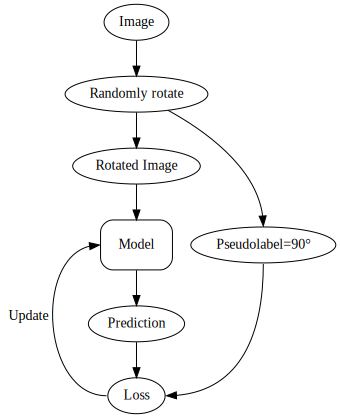

In [147]:
#hide
SVG(generate_graph("""
    Model[shape=box style=rounded width=1 height=0.7 label=Model]
    
    Image -> "Randomly rotate";
    "Randomly rotate" -> "Rotated Image";
    "Rotated Image" -> Model[weight=10];
    Model -> Prediction[weight=8];
    Prediction-> Loss[weight=8];
    "Randomly rotate" -> "Pseudolabel=90°"[weight=0, headport=n];
    "Pseudolabel=90°" -> Loss[weight=0 headport=e tailport=s];
    Loss -> Model[xlabel="Update  ", tailport=w, headport=w]
    """,
    mode="tb",
    fname="rot-chart"
))

<figure id="Fig8">
        <div>
            <figure>
<img src="2020-11-25/rot-chart.svg" alt="Flowchart of rotation based self-supervised learning">
            </figure>
        </div>
    <figcaption><center>Fig. 8: Rotation based self-supervised learning</center></figcaption>
</figure>

But, what is the result of such an unsupervised training loop? In short, a *trained* model. The model should detect and differentiate objects from each other without being explicitly taught what these objects are. 
Some applications then work with the trained model without changing it.
Others *finetune* the model on a similar, small labeled dataset. In the finetune procedure, only minor changes to the model are made. Here, we are trying to tell the model what objects we are *interested* in.

Looking back to our previous example, we could train a model on random images from [Flickr](https://www.flickr.com/explore) without labeling them. Afterwards, we finetune our model to differentiate between dogs and cats by supplying a small labeled dataset. The model should perform very well without a lot of training because it already *knows* how to differentiate dogs and cats by looking at random images from Flickr. At least, this is what we hope. Our dataset *pushes* the model to focus on a specific task.

In the research community, the self-supervised learning methods are evaluated by a similar procedure.
First, the model is trained on a dataset without using any human-annotated labels and is then finetuned on a *downstream task* of a different dataset. A possible downstream task would be to classify dogs and cats. The score of the downstream tasks is used as a quantitive measure of the generability of the model.

<!-- How are these models being deployed? -->

The authors from Jing _et. al_ {% cite Jing2020 %} gave a very detailed overview of the various self-supervision approaches. For images, there are three significant types of pretext tasks, as shown in <a href="#Fig9">Fig. 9</a>.

In [68]:
#hide
generate_graph(
    """
    "Pretext tasks" -> "Generation-based\nmethods"
    "Pretext tasks" -> "Context-based methods"
    "Pretext tasks" -> "Free Semantic\nLabel-based methods"
    """,
    mode="TB",
    fname="pretext-tasks"
);

<figure id="Fig9">
        <div>
            <figure>
<img src="2020-11-25/pretext-tasks.svg" alt="Mindmap of the three big pretext task types">
            </figure>
        </div>
    <figcaption><center>Fig. 9: The three pretext task types</center></figcaption>
</figure>

In *generation-based* methods, the model has to *generate* data to match the pseudolabel. For example, the model gets a grayscale image and has to colorize the image. The pseudolabel would be the original RGB image by itself! A different generation based method would be to *cut* out parts of the image and to let the model try to synthesize the missing region.

Our previous rotation example, where the model had to guess the image's rotation, is a _context-based_ method. The context can be derived from the image itself (rotation, solving spatial puzzles) or by context similarity.

Both of these pretext tasks implicitly force the networks to learn semantic features. In our rotation example, we never tell the model what
the objects are, but it has to learn various objects' features to predict the rotation correctly. If one doesn't know how animals, walls, water, ground, sky, hills, etc. look like, you couldn't predict how much an image was rotated.

*Free semantic label-based* methods take a more direct approach. Here the manual annotation effort is bypassed by automatically generating *true* labels. Hence the name, *free semantic label*. Usually, game engines are utilized to generate object maps. In other words, we generate the images with the help of the game engine, and because we know what we are rendering and where we are putting the objects, we get the *labels* for free.  Due to the synthetic nature, the pixels that belong to an object can be automatically generated, or the object names themselves can be exported.
Here, the model directly learns visual features; *But* there is a domain gap between synthetic and natural images. 

Each method has its strength and weakness. But, before we go into any more detail, let's summarize our findings so far. 

## Summary

These are the main things you should take away from this post:
1. Currently, supervised learning methods lead to the best performance, but require human-annotated images
1. Annotating images is costly and takes a lot of time, good unsupervised approaches could open up deep-learning for even more use-cases.
1. Self-supervised learning is a subset of unsupervised learning.
1. As a subset of unsupervised learning, self-supervised learning does not require any labels.
1. Self-supervised methods generate their *own* labels, pseudolabels, by completing a pretext task
1. There are three different pretext tasks
    - generation-based methods
    - context-based methods
    - free semantic labels-based methods

**PS:**

:tada: You made it until the end of this long post! :tada:

This post was quite long and is probably hard to follow without any prior knowledge of machine/deep-learning. Hopefully, the main points of the posts were still clear. 

In the next posts, we will take a closer look at the different self-supervision based methods and think about how applicable they would be in a remote sensing setting.

Until then, have a productive time! :+1:

## References

{% bibliography --cited_in_order %}